# If you draw a monster, what is the probability  of the monster being a unique ace monster from a deck of 60 cards at the start of the game in Yugioh. The start of the game has each player draw 5 cards

This study will be an observational study (as I won't be changing any variables within this, only observing using a technique) using this code to randomly pull 5 cards and check if one of them is the selected target. 

The Sample Space I am observing is any of the monster cards I draw within the 5 cards that are drawn from a deck at the start of a duel. One trial of the simulation is pulling 5 cards during the start of the game, and I am measuring the outcome of a deck's unique ace monster being drawn. This assumes there is only one ace monster being kept in a deck. I will also be assuming half of the deck is monster cards

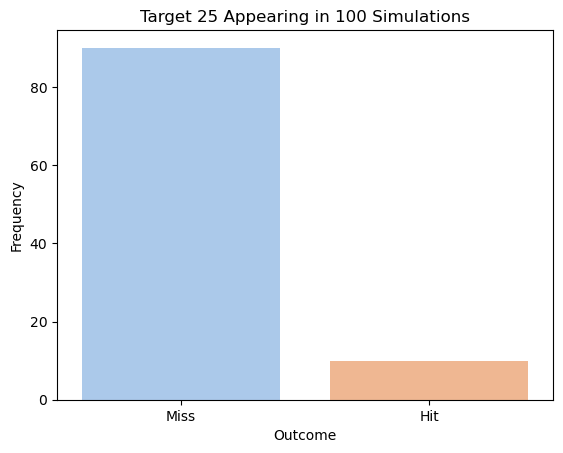

Empirical Probability: 0.10


In [4]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
sample_space = list(range(1, 61))  # values 1 through 60
target = 25
num_draws = 5
num_simulations = 100

# Run simulations
results = []
for i in range(num_simulations):
    draw = random.sample(sample_space, num_draws)
    results.append("Hit" if target in draw else "Miss")

# Convert results to DataFrame
df = pd.DataFrame(results, columns=["Outcome"])

# Count results
counts = df["Outcome"].value_counts().reset_index()
counts.columns = ["Outcome", "Count"]

# Plot with seaborn
sns.barplot(data=counts, x="Outcome", y="Count", palette="pastel")
plt.title(f"Target {target} Appearing in {num_simulations} Simulations")
plt.ylabel("Frequency")
plt.show()

empirical_prob = df["Outcome"].value_counts(normalize=True)["Hit"]
print(f"Empirical Probability: {empirical_prob:.2f}")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


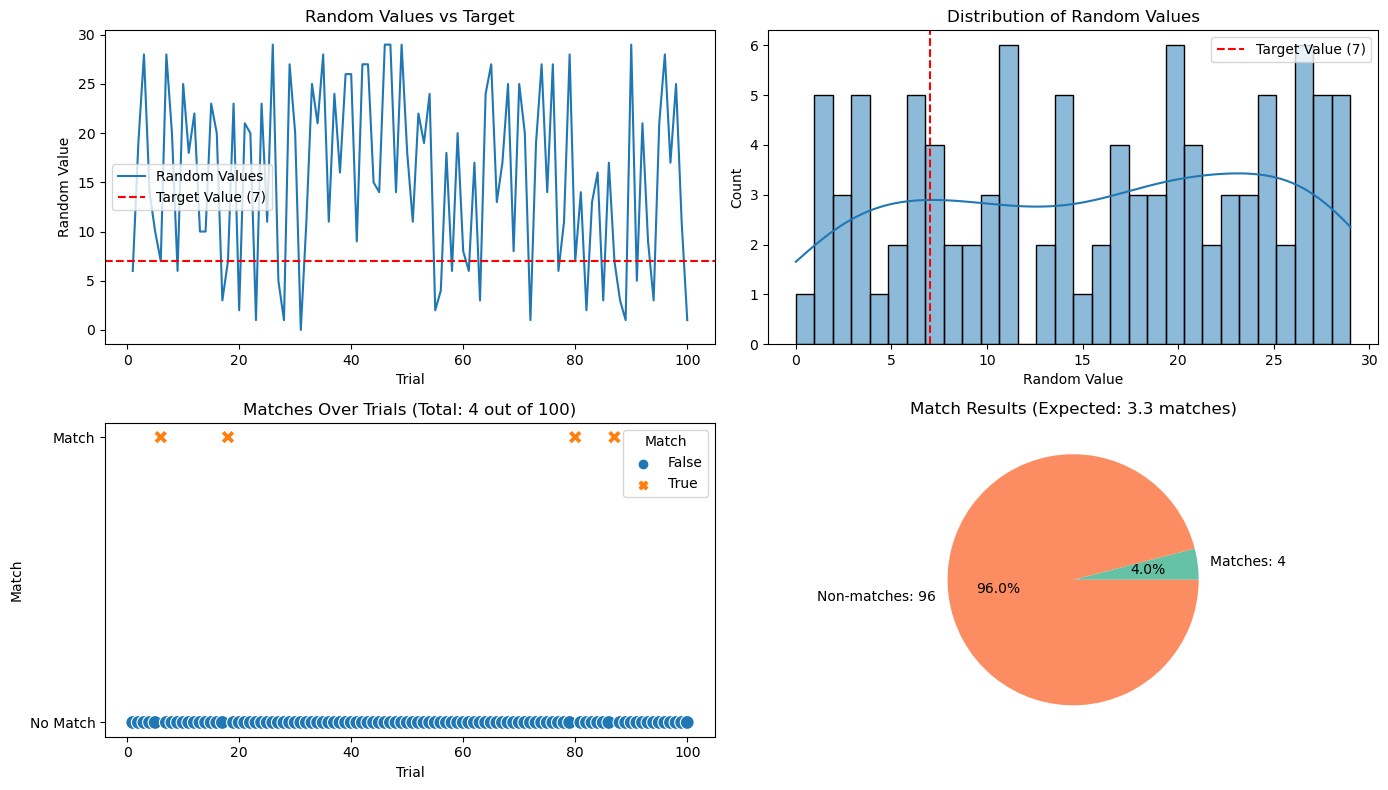

Summary: Found 4 matches out of 100 trials
Expected number of matches: 3.33


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Function to run the experiment
def check_random_matches(target_value, num_trials=100, max_value=30):
    # Ensure target value is valid
    if target_value < 0 or target_value >= max_value:
        raise ValueError(f"Target value must be between 0 and {max_value-1}")
    
    # Generate 100 random integers between 0 and 29
    random_values = np.random.randint(0, max_value, num_trials)
    
    # Check which values match the target
    matches = random_values == target_value
    
    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Trial': range(1, num_trials + 1),
        'Random Value': random_values,
        'Target Value': target_value,
        'Match': matches
    })
    
    # Calculate statistics
    total_matches = matches.sum()
    expected_matches = num_trials / max_value
    
    # Create visualizations
    plt.figure(figsize=(14, 8))
    
    # Plot 1: Line plot showing random values and target
    plt.subplot(2, 2, 1)
    sns.lineplot(x='Trial', y='Random Value', data=df, label='Random Values')
    plt.axhline(y=target_value, color='r', linestyle='--', label=f'Target Value ({target_value})')
    plt.title('Random Values vs Target')
    plt.legend()
    
    # Plot 2: Histogram of random values
    plt.subplot(2, 2, 2)
    sns.histplot(df['Random Value'], bins=max_value, kde=True)
    plt.axvline(x=target_value, color='r', linestyle='--', label=f'Target Value ({target_value})')
    plt.title('Distribution of Random Values')
    plt.legend()
    
    # Plot 3: Match results over trials
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Trial', y='Match', data=df, hue='Match', style='Match', s=100)
    plt.title(f'Matches Over Trials (Total: {total_matches} out of {num_trials})')
    plt.yticks([0, 1], ['No Match', 'Match'])
    
    # Plot 4: Pie chart of match results
    plt.subplot(2, 2, 4)
    plt.pie([total_matches, num_trials - total_matches], 
            labels=[f'Matches: {total_matches}', f'Non-matches: {num_trials - total_matches}'],
            autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    plt.title(f'Match Results (Expected: {expected_matches:.1f} matches)')
    
    plt.tight_layout()
    plt.show()
    
    return df

# Example usage
target = 7  # The value we're looking for
results = check_random_matches(target)

print(f"Summary: Found {results['Match'].sum()} matches out of 100 trials")
print(f"Expected number of matches: {100/30:.2f}")

The theoretical probability of the monster you draw from your deck being a unique ace monster is 1/30 or about 3.3% The empirical probability of drawing a unique ace monster is 4/100 or 4%